In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np

In [3]:
from utils.utils import load_data

FOLDER_PATH = "sentiment_datasets/projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,8068,feminist conspiracy theorist,2,2
1,8068,conspiracy theorist,2,2
2,8068,theorist,2,2
3,8068,named dirty dick,2,2
4,8068,dirty dick,2,2
5,8069,"the aaa of action, xxx is a blast of adrenalin...",4,2
6,8069,the aaa of action,3,2
7,8069,the aaa,2,2
8,8069,aaa,2,2
9,8069,", xxx is a blast of adrenalin, rated eee for e...",4,2


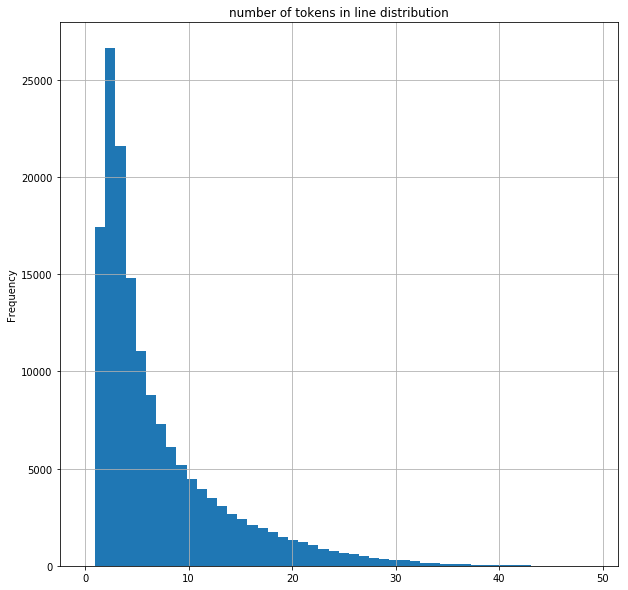

In [4]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# USE

In [5]:
from preprocess_data.preprocess_data import preprocess_data_word
from utils.utils_result import save_report, update_fit_params, evaluation

In [6]:
# preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), data = preprocess_data_word(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=50)

In [7]:
import tensorflow as tf

In [8]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (1,),
    "dtype": tf.string
}

test_result_dict = {}

## Phrase Level FFNN

In [13]:
from architecture.models import model_ffnn

In [14]:
# parameters setting
use_params_ffnn = {
    "trainable": True,
    "output_dim": 512
}

params_use_raw = {
    "input_layer": "simple_input",
    "emb_layer": "USE",
    "input_params": input_params,
    "emb_params": use_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_use_ffnn"
model_use_ffnn = model_ffnn(params_use_raw)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0527 21:13:48.991532 140173183612736 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [ ]:
# training
model_use_ffnn.fit(**fit_params);
model_use_ffnn = save_report(model=model_use_ffnn, model_name=model_name, markered_path=markered_path)

In [ ]:
# evaluation
test_result_dict = evaluation(model=model_use_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)